In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
 
# The code in this notebook should work identically in TF v1 and v2
import tensorflow as tf
import zipfile
 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
local_zip = '/pacetranfer.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/pacetranfer'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validate')
test_dir=os.path.join(base_dir,'test')

train_buildings_dir = os.path.join(train_dir, 'buildings')
train_cafe_dir = os.path.join(train_dir, 'cafe')
train_classrooms_dir = os.path.join(train_dir, 'classrooms')


validation_buildings_dir = os.path.join(validation_dir, 'buildings')
validation_cafe_dir = os.path.join(validation_dir, 'cafe')
validation_classrooms_dir = os.path.join(validation_dir, 'classrooms')



In [ ]:
num_buildings_tr = len(os.listdir(train_buildings_dir))
num_cafe_tr = len(os.listdir(train_cafe_dir))
num_classrooms_tr = len(os.listdir(train_classrooms_dir))


num_buildings_val = len(os.listdir(validation_buildings_dir))
num_cafe_val = len(os.listdir(validation_cafe_dir))
num_classrooms_val = len(os.listdir(validation_classrooms_dir))


total_train = num_buildings_tr + num_cafe_tr + num_classrooms_tr 
total_val = num_buildings_val + num_cafe_val + num_classrooms_val
total_test=len(os.listdir(test_dir))

In [ ]:
print('Training building images:', num_buildings_tr)
print('Training cafe images:', num_cafe_tr)
print('Training classroom images:', num_classrooms_tr)


print('Validation building images:', num_buildings_val)
print('Validation cafe images:', num_cafe_val)
print('Validation classroom images:', num_classrooms_val)

print('Total training images: ', total_train)
print('Total test images: ', total_test)
print('Total validation images: ', total_val)

Training building images: 15
Training cafe images: 15
Training classroom images: 15
Validation building images: 5
Validation cafe images: 5
Validation classroom images: 5
Total training images:  45
Total test images:  15
Total validation images:  15


In [ ]:
conv_base = VGG16(weights='imagenet',include_top=False, input_shape=(150, 150, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
conv_base.trainable = False

In [ ]:
TARGET_SHAPE = 150 
BATCH_SIZE = 32

In [ ]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      )
train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=train_dir, 
    shuffle=True, 
    target_size=(TARGET_SHAPE,TARGET_SHAPE),
    class_mode='categorical')
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=validation_dir, 
    target_size=(TARGET_SHAPE, TARGET_SHAPE),
    class_mode='categorical')



Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [ ]:
EPOCHS = 20
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Now is a good time for a cup of coffee
history = model.fit_generator(
      train_data_gen,
      steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
      epochs=EPOCHS,
      validation_data=val_data_gen,
      validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
      verbose=2)

Epoch 1/20
2/2 - 14s - loss: 4.3413 - acc: 0.2889 - val_loss: 4.9518 - val_acc: 0.3333
Epoch 2/20
2/2 - 12s - loss: 2.8113 - acc: 0.5111 - val_loss: 1.0671 - val_acc: 0.4000
Epoch 3/20
2/2 - 11s - loss: 0.3656 - acc: 0.8000 - val_loss: 1.6014 - val_acc: 0.4667
Epoch 4/20
2/2 - 12s - loss: 0.6091 - acc: 0.6667 - val_loss: 0.7961 - val_acc: 0.8000
Epoch 5/20
2/2 - 12s - loss: 0.0703 - acc: 1.0000 - val_loss: 0.4011 - val_acc: 0.8000
Epoch 6/20
2/2 - 11s - loss: 0.0408 - acc: 0.9778 - val_loss: 0.6431 - val_acc: 0.7333
Epoch 7/20
2/2 - 10s - loss: 0.1125 - acc: 0.9778 - val_loss: 0.7464 - val_acc: 0.7333
Epoch 8/20
2/2 - 11s - loss: 0.0724 - acc: 0.9778 - val_loss: 0.6051 - val_acc: 0.8000
Epoch 9/20
2/2 - 10s - loss: 0.0265 - acc: 1.0000 - val_loss: 0.4366 - val_acc: 0.8667
Epoch 10/20
2/2 - 12s - loss: 0.0085 - acc: 1.0000 - val_loss: 0.3420 - val_acc: 0.8000
Epoch 11/20
2/2 - 12s - loss: 0.0029 - acc: 1.0000 - val_loss: 0.3147 - val_acc: 0.8000
Epoch 12/20
2/2 - 10s - loss: 0.0021 - ac

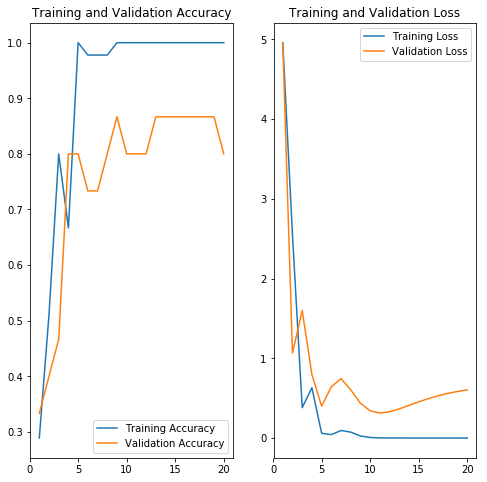

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
sample_training_images, sample_training_labels = next(train_data_gen)


In [ ]:
# This function will plot images in a grid with 1 row and 5 columns
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.grid(False)
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

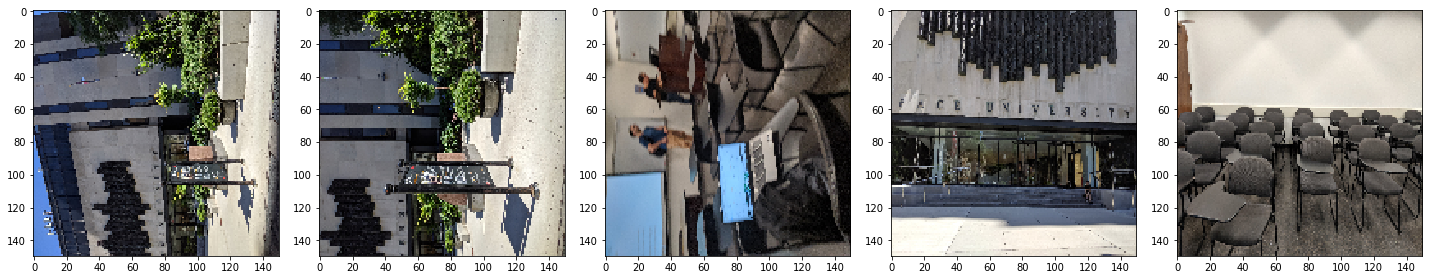

In [ ]:
plotImages(sample_training_images[:5])

In [ ]:
test_data_dir='/tmp/pacetranfer/test/'
def predict_labels(model):
    """writes test image labels and predictions to csv"""
    
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_height, img_width),
        batch_size=32,
        shuffle=False,
        class_mode=None)

    base_path = test_data_dir + "/test/"

    with open("prediction.csv", "w") as f:
        p_writer = csv.writer(f, delimiter=',', lineterminator='\n')
        for _, _, imgs in os.walk(base_path):
            for im in imgs:
                pic_id = im.split(".")[0]
                img = load_img(base_path + im)
                img = imresize(img, size=(img_height, img_width))
                test_x = img_to_array(img).reshape(3, img_height, img_width)
                test_x = test_x.reshape((1,) + test_x.shape)
                test_generator = test_datagen.flow(test_x,
                                                   batch_size=1,
                                                   shuffle=False)
                prediction = model.predict_generator(test_generator, 1)[0][0]
                p_writer.writerow([pic_id, prediction])
                

